### FBI Hate Crime Database Analysis

The data downloaded from the [FBI website](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2020-hate-crime-statistics) for hate crimes was uploaded in this code, filtered, and analyzed. The data contains records of hate crimes from 1991 to 2020, with around 200,000 total entries. This data was analyzed for the purposes of the Introduction to Data Science course at the University of Utah. This particular Notebook collects the total number of hate crimes from 1991 to 2020, as well as collecting the number of articles written regarding hate crimes. Both the raw data and a rolling average for these were plotted over time. 

It is recommended to run this code only using 1000 data points instead of the full length of the data set "filtered_data".

In [1]:
# Import libraries and the csv file
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import scipy as sc
import statsmodels.formula.api as sm
import csv
from matplotlib import cm
from pandas.plotting import scatter_matrix
import seaborn as sns
import random
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

data = pd.read_csv("Data/hate_crime.csv")

/Users/marniepstein/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Filter whole data frame to have only the data we want to look at
filtered_data = data.drop(columns = ["PUB_AGENCY_UNIT", "STATE_NAME","ADULT_VICTIM_COUNT", "JUVENILE_VICTIM_COUNT", 
                                     "ADULT_OFFENDER_COUNT", "JUVENILE_OFFENDER_COUNT"] )

In [3]:
# This section of code counts the total number of hate crimes committed by each major demographic group

offender_race_counter = [0]*6

i = 0
while i < len(filtered_data):
        
    # For offender race, white = 1, black/african american = 2, asian = 3, multiple = 4, unknown = 5, other = 6
    if filtered_data.iloc[i,12] == "White":
        filtered_data.iloc[i,12] = 1
        offender_race_counter[0] += 1
        
    elif filtered_data.iloc[i,12] == "Black or African American":
        filtered_data.iloc[i,12] = 2
        offender_race_counter[1] += 1

    elif filtered_data.iloc[i,12] == "Asian":
        filtered_data.iloc[i,12] = 3
        offender_race_counter[2] += 1

    elif filtered_data.iloc[i,12] == "Multiple":
        filtered_data.iloc[i,12] = 4
        offender_race_counter[3] += 1

    elif filtered_data.iloc[i,12] == "Unknown":
        filtered_data.iloc[i,12] = 5
        offender_race_counter[4] += 1

    else:
        filtered_data.iloc[i,12] = 6      
        offender_race_counter[5] += 1

    i += 1

In [4]:
# This section of code counts the total number of hate crimes for each mode of violence

offense_counter = [0]*7

i = 0
while i < len(filtered_data):
    # For offense type, 1 = intimidation, 2 = simple assault, 3 = Aggravated Assault, 4 = robbery, 
    # 5 =  murder and nonnegligent manslaughter, 6 = arson, 7 = multiple types or other
    if filtered_data.iloc[i,15] == "Intimidation":
        filtered_data.iloc[i,15] = 1
        offense_counter[0] += 1
        
    elif filtered_data.iloc[i,15] == "Simple Assault":
        filtered_data.iloc[i,15] = 2
        offense_counter[1] += 1
        
    elif filtered_data.iloc[i,15] == "Aggravated Assault":
        filtered_data.iloc[i,15] = 3
        offense_counter[2] += 1        
        
    elif filtered_data.iloc[i,15] == "Robbery":
        filtered_data.iloc[i,15] = 4
        offense_counter[3] += 1        
        
    elif filtered_data.iloc[i,15] == "Murder and Nonnegligent Manslaughter":
        filtered_data.iloc[i,15] = 5
        offense_counter[4] += 1        
        
    elif filtered_data.iloc[i,15] == "Arson":
        filtered_data.iloc[i,15] = 6
        offense_counter[5] += 1        
        
    else:
        filtered_data.iloc[i,15] = 7 
        offense_counter[6] += 1
    i += 1




In [5]:
# This section of code counts the total number of hate crimes at certain locations

location_counter = [0] * 19
i = 0
while i < len(filtered_data):
    
    # For location type, 1 = highway/street, 2 = residence/home, 3 = religious building, 4 = school, 5 = supermarket, 6 = office building, 
    # 7 = transportation, 8 = hotel/motel, 9 = convenience store, 10 = bar, 11 = parking area, 12 = medical building,
    # 13 = Government/Public Building, 14 = Jail, 15 = Field/Woods, 16 = Bank, 17 = Specialty Store, 18 = Service/Gas Station 
    # 19 = other
    if filtered_data.iloc[i,17] == "Highway/Road/Alley/Street/Sidewalk":
        filtered_data.iloc[i,17] = 1
        location_counter[0] += 1
        
    elif filtered_data.iloc[i,17] == "Residence/Home":
        filtered_data.iloc[i,17] = 2
        location_counter[1] += 1
        
    elif filtered_data.iloc[i,17] == "Church/Synagogue/Temple/Mosque":
        filtered_data.iloc[i,17] = 3
        location_counter[2] += 1
        
    elif filtered_data.iloc[i,17] == "School/College":
        filtered_data.iloc[i,17] = 4
        location_counter[3] += 1
        
    elif filtered_data.iloc[i,17] == "Grocery/Supermarket":
        filtered_data.iloc[i,17] = 5
        location_counter[4] += 1
        
    elif filtered_data.iloc[i,17] == "Commercial/Office Building":
        filtered_data.iloc[i,17] = 6
        location_counter[5] += 1
        
    elif filtered_data.iloc[i,17] == "Air/Bus/Train Terminal":
        filtered_data.iloc[i,17] = 7
        location_counter[6] += 1
        
    elif filtered_data.iloc[i,17] == "Hotel/Motel/Etc.":
        filtered_data.iloc[i,17] = 8
        location_counter[7] += 1
        
    elif filtered_data.iloc[i,17] == "Convenience Store":
        filtered_data.iloc[i,17] = 9
        location_counter[8] += 1
        
    elif filtered_data.iloc[i,17] == "Bar/Nightclub":
        filtered_data.iloc[i,17] = 10
        location_counter[9] += 1
        
    elif filtered_data.iloc[i,17] == "Parking/Drop Lot/Garage":
        filtered_data.iloc[i,17] = 11
        location_counter[10] += 1
        
    elif filtered_data.iloc[i,17] == "Drug Store/Doctor's Office/Hospital":
        filtered_data.iloc[i,17] = 12
        location_counter[11] += 1 
        
    elif filtered_data.iloc[i,17] == "Government/Public Building":
        filtered_data.iloc[i,17] = 13
        location_counter[12] += 1
        
    elif filtered_data.iloc[i,17] == "Jail/Prison/Penitentiary/Corrections Facility":
        filtered_data.iloc[i,17] = 14
        location_counter[13] += 1 
        
    elif filtered_data.iloc[i,17] == "Field/Woods":
        filtered_data.iloc[i,17] = 15
        location_counter[14] += 1 
    
    elif filtered_data.iloc[i,17] == "Bank/Savings and Loan": 
        filtered_data.iloc[i,17] = 16
        location_counter[15] += 1 
        
    elif filtered_data.iloc[i,17] == "Specialty Store":
        filtered_data.iloc[i,17] = 17
        location_counter[16] += 1 
    
    elif filtered_data.iloc[i,17] == "Service/Gas Station":
        filtered_data.iloc[i,17] = 18
        location_counter[17] += 1 
        
    else:
        filtered_data.iloc[i,17] = 19  
        location_counter[18] += 1
    
    i += 1

In [6]:
# This section of code counts the total number of hate crimes committed against certain populations

bias_description_counter = [0]*20

i = 0
while i < len(filtered_data):
    # For bias description, 1 = anti-black, 2 = anti-white, 3 = anti-jewish, 4 = anti-arab, 5 = anti-islamic, 
    # 6 = anti protestant, 7 = anti-catholic, 8 = anti- other religion, 9 = anti-gay (male), 10 = anti-gay (female)
    # 11 = anti-asian, 12 = anti-hispanic, 13 = anti-lgbt, 14 = anti-native american, 15 = anti-mental disability
    # 16 = anti-sikh, 17 = anti-physical disability, 18 = anti-transgender
    
    if filtered_data.iloc[i,18] == "Anti-Black or African American":
        filtered_data.iloc[i,18] = 1
        bias_description_counter[0] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-White":
        filtered_data.iloc[i,18] = 2
        bias_description_counter[1] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Jewish":
        filtered_data.iloc[i,18] = 3
        bias_description_counter[2] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Arab":
        filtered_data.iloc[i,18] = 4
        bias_description_counter[3] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Islamic (Muslim)":
        filtered_data.iloc[i,18] = 5
        bias_description_counter[4] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Protestant":
        filtered_data.iloc[i,18] = 6
        bias_description_counter[5] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Catholic":
        filtered_data.iloc[i,18] = 7
        bias_description_counter[6] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Other Religion":
        filtered_data.iloc[i,18] = 8
        bias_description_counter[7] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Gay (Male)":
        filtered_data.iloc[i,18] = 9
        bias_description_counter[8] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Lesbian (Female)":
        filtered_data.iloc[i,18] = 10
        bias_description_counter[9] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Asian":
        filtered_data.iloc[i,18] = 11
        bias_description_counter[10] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Hispanic or Latino":
        filtered_data.iloc[i,18] = 12
        bias_description_counter[11] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":
        filtered_data.iloc[i,18] = 13
        bias_description_counter[12] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-American Indian or Alaska Native":
        filtered_data.iloc[i,18] = 14
        bias_description_counter[13] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Mental Disability":
        filtered_data.iloc[i,18] = 15
        bias_description_counter[14] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Sikh":
        filtered_data.iloc[i,18] = 16
        bias_description_counter[15] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Physical Disability":
        filtered_data.iloc[i,18] = 17
        bias_description_counter[16] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Transgender":
        filtered_data.iloc[i,18] = 18
        bias_description_counter[17] += 1
        
    elif filtered_data.iloc[i,18] == "Native Hawaiian or Other Pacific Islander":
        filtered_data.iloc[i,19] = 19
        bias_description_counter[18] += 1
        
    else:
        filtered_data.iloc[i,18] = 20
        bias_description_counter[19] += 1
        
    i += 1

    

In [7]:
# This code is used to create the aapi crimes by state csv

#state_counter = [0] * 54
# aapi_counter = [0] * 54
# white_offender_counter = [0] * 54

# i = 0
# while i < len(filtered_data):
#     # For state, organized alphabetically.
#     if filtered_data.iloc[i,5] == "AL":
#         filtered_data.iloc[i,5] = 1
#         state_counter[0] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[0] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[0] += 1
             
#     elif filtered_data.iloc[i,5] == "AK":
#         filtered_data.iloc[i,5] = 2
#         state_counter[1] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[1] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[1] += 1
            
#     elif filtered_data.iloc[i,5] == "AZ":
#         filtered_data.iloc[i,5] = 3
#         state_counter[2] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[2] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[2] += 1
                
#     elif filtered_data.iloc[i,5] == "AR":
#         filtered_data.iloc[i,5] = 4
#         state_counter[3] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[3] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[3] += 1
                   
#     elif filtered_data.iloc[i,5] == "CA":
#         filtered_data.iloc[i,5] = 5
#         state_counter[4] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[4] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[4] += 1
                    
#     elif filtered_data.iloc[i,5] == "CO":
#         filtered_data.iloc[i,5] = 6
#         state_counter[5] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[5] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[5] += 1
                    
#     elif filtered_data.iloc[i,5] == "CT":
#         filtered_data.iloc[i,5] = 7
#         state_counter[6] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[6] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[6] += 1
                    
#     elif filtered_data.iloc[i,5] == "DE":
#         filtered_data.iloc[i,5] = 8
#         state_counter[7] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[7] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[7] += 1
                    
#     elif filtered_data.iloc[i,5] == "FL":
#         filtered_data.iloc[i,5] = 9
#         state_counter[8] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[8] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[8] += 1
                    
#     elif filtered_data.iloc[i,5] == "GA":
#         filtered_data.iloc[i,5] = 10
#         state_counter[9] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[9] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[9] += 1
                    
#     elif filtered_data.iloc[i,5] == "HI":
#         filtered_data.iloc[i,5] = 11
#         state_counter[10] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[10] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[10] += 1
                    
#     elif filtered_data.iloc[i,5] == "ID":
#         filtered_data.iloc[i,5] = 12
#         state_counter[11] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[11] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[11] += 1
                    
#     elif filtered_data.iloc[i,5] == "IL":
#         filtered_data.iloc[i,5] = 13
#         state_counter[12] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[12] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[12] += 1
                    
#     elif filtered_data.iloc[i,5] == "IN":
#         filtered_data.iloc[i,5] = 14
#         state_counter[13] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[13] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[13] += 1
                    
#     elif filtered_data.iloc[i,5] == "IA":
#         filtered_data.iloc[i,5] = 15
#         state_counter[14] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[14] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[14] += 1
                    
#     elif filtered_data.iloc[i,5] == "KS":
#         filtered_data.iloc[i,5] = 16
#         state_counter[15] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[15] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[15] += 1
                    
#     elif filtered_data.iloc[i,5] == "KY":
#         filtered_data.iloc[i,5] = 17
#         state_counter[16] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[16] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[16] += 1
                    
#     elif filtered_data.iloc[i,5] == "LA":
#         filtered_data.iloc[i,5] = 18
#         state_counter[17] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[17] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[17] += 1
                    
#     elif filtered_data.iloc[i,5] == "ME":
#         filtered_data.iloc[i,5] = 19
#         state_counter[18] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[18] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[18] += 1
                    
#     elif filtered_data.iloc[i,5] == "MD":
#         filtered_data.iloc[i,5] = 20
#         state_counter[19] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[19] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[19] += 1
                    
#     elif filtered_data.iloc[i,5] == "MA":
#         filtered_data.iloc[i,5] = 21
#         state_counter[20] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[20] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[20] += 1
                    
#     elif filtered_data.iloc[i,5] == "MI":
#         filtered_data.iloc[i,5] = 22
#         state_counter[21] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[21] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[21] += 1
                    
#     elif filtered_data.iloc[i,5] == "MN":
#         filtered_data.iloc[i,5] = 23
#         state_counter[22] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[22] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[22] += 1
                    
#     elif filtered_data.iloc[i,5] == "MS":
#         filtered_data.iloc[i,5] = 24
#         state_counter[23] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[23] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[23] += 1
                    
#     elif filtered_data.iloc[i,5] == "MO":
#         filtered_data.iloc[i,5] = 25
#         state_counter[24] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[24] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[24] += 1
                    
#     elif filtered_data.iloc[i,5] == "MT":
#         filtered_data.iloc[i,5] = 26
#         state_counter[25] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[25] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[25] += 1
                    
#     elif filtered_data.iloc[i,5] == "NB":
#         filtered_data.iloc[i,5] = 27
#         state_counter[26] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[26] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[26] += 1
                    
#     elif filtered_data.iloc[i,5] == "NV":
#         filtered_data.iloc[i,5] = 28
#         state_counter[27] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[27] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[27] += 1
                    
#     elif filtered_data.iloc[i,5] == "NH":
#         filtered_data.iloc[i,5] = 29
#         state_counter[28] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[28] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[28] += 1
                    
#     elif filtered_data.iloc[i,5] == "NJ":
#         filtered_data.iloc[i,5] = 30
#         state_counter[29] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[29] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[29] += 1
                    
#     elif filtered_data.iloc[i,5] == "NM":
#         filtered_data.iloc[i,5] = 31
#         state_counter[30] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[30] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[30] += 1
                    
#     elif filtered_data.iloc[i,5] == "NY":
#         filtered_data.iloc[i,5] = 32
#         state_counter[31] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[31] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[31] += 1
                    
#     elif filtered_data.iloc[i,5] == "NC":
#         filtered_data.iloc[i,5] = 33
#         state_counter[32] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[32] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[32] += 1
                    
#     elif filtered_data.iloc[i,5] == "ND":
#         filtered_data.iloc[i,5] = 34
#         state_counter[33] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[33] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[33] += 1
                    
#     elif filtered_data.iloc[i,5] == "OH":
#         filtered_data.iloc[i,5] = 35
#         state_counter[34] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[34] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[34] += 1
                    
#     elif filtered_data.iloc[i,5] == "OK":
#         filtered_data.iloc[i,5] = 36
#         state_counter[35] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[35] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[35] += 1
                    
#     elif filtered_data.iloc[i,5] == "OR":
#         filtered_data.iloc[i,5] = 37
#         state_counter[36] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[36] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[36] += 1
                    
#     elif filtered_data.iloc[i,5] == "PA":
#         filtered_data.iloc[i,5] = 38
#         state_counter[37] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[37] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[37] += 1
                    
#     elif filtered_data.iloc[i,5] == "RI":
#         filtered_data.iloc[i,5] = 39
#         state_counter[38] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[38] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[38] += 1
                    
#     elif filtered_data.iloc[i,5] == "SC":
#         filtered_data.iloc[i,5] = 40
#         state_counter[39] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[39] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[39] += 1
                    
#     elif filtered_data.iloc[i,5] == "SD":
#         filtered_data.iloc[i,5] = 41
#         state_counter[40] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[40] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[40] += 1
                    
#     elif filtered_data.iloc[i,5] == "TN":
#         filtered_data.iloc[i,5] = 42
#         state_counter[41] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[41] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[41] += 1
                    
#     elif filtered_data.iloc[i,5] == "TX":
#         filtered_data.iloc[i,5] = 43
#         state_counter[42] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[42] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[42] += 1
                    
#     elif filtered_data.iloc[i,5] == "UT":
#         filtered_data.iloc[i,5] = 44
#         state_counter[43] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[43] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[43] += 1
                    
#     elif filtered_data.iloc[i,5] == "VT":
#         filtered_data.iloc[i,5] = 45
#         state_counter[44] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[44] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[44] += 1
                    
#     elif filtered_data.iloc[i,5] == "VA":
#         filtered_data.iloc[i,5] = 46
#         state_counter[45] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[45] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[45] += 1
                    
#     elif filtered_data.iloc[i,5] == "WA":
#         filtered_data.iloc[i,5] = 47
#         state_counter[46] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[46] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[46] += 1
                    
#     elif filtered_data.iloc[i,5] == "WV":
#         filtered_data.iloc[i,5] = 48
#         state_counter[47] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[47] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[47] += 1
                    
#     elif filtered_data.iloc[i,5] == "WI":
#         filtered_data.iloc[i,5] = 49
#         state_counter[48] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[48] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[48] += 1
                    
#     elif filtered_data.iloc[i,5] == "WY":
#         filtered_data.iloc[i,5] = 50
#         state_counter[49] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[49] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[49] += 1
            
#     elif filtered_data.iloc[i,5] == "DC":
#         filtered_data.iloc[i,5] = 51
#         state_counter[50] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[50] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[50] += 1
            
#     elif filtered_data.iloc[i,5] == "GM":
#         filtered_data.iloc[i,5] = 52
#         state_counter[51] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[51] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[51] += 1
            
            
#     elif filtered_data.iloc[i,5] == "FS":
#         filtered_data.iloc[i,5] = 53
#         state_counter[52] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#              aapi_counter[52] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[52] += 1
                    
#     else: 
#         filtered_data.iloc[i,5] = 54
#         state_counter[53] += 1
#         if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
#             aapi_counter[53] += 1
#         if filtered_data.iloc[i,12] == 1:
#             white_offender_counter[53] += 1
                
#     i += 1

In [8]:
# This section of code counts the number of hate crimes committed for each month of the year

month_counter = [0]*12

i = 0
while i < len(filtered_data):
    
    if filtered_data.iloc[i,10][3:6] == "JAN":
        month_counter[0] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "FEB":
        month_counter[1] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "MAR":
        month_counter[2] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "APR":
        month_counter[3] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "MAY":
        month_counter[4] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "JUN":
        month_counter[5] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "JUL":
        month_counter[6] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "AUG":
        month_counter[7] += 1

    elif filtered_data.iloc[i,10][3:6] == "SEP":
        month_counter[8] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "OCT":
        month_counter[9] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "NOV":
        month_counter[10] += 1
        
    elif filtered_data.iloc[i,10][3:6] == "DEC":
        month_counter[11] += 1
        
    i += 1    




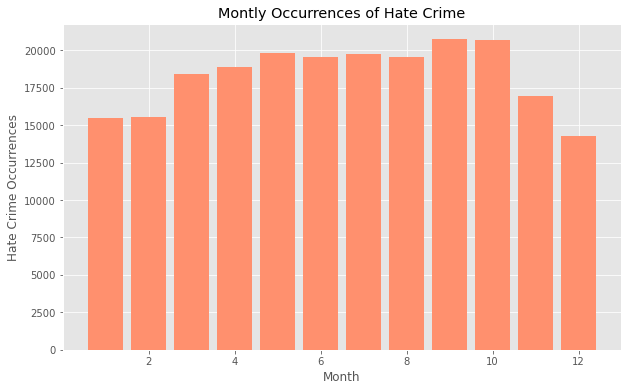

In [9]:
# This code plots the monthly occurrences of hate crimes

plt.style.use('ggplot')

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x_pos = [i for i in range(1, 13)]

plt.bar(x_pos, month_counter, color='#ff906e')
plt.xlabel("Month")
plt.ylabel("Hate Crime Occurrences")
plt.title("Montly Occurrences of Hate Crime")

plt.show()

In [10]:
# Calculate Crimes per month per year

month_counter1 = [0]*30
month_counter2 = [0]*30
month_counter3 = [0]*30
month_counter4 = [0]*30
month_counter5 = [0]*30
month_counter6 = [0]*30
month_counter7 = [0]*30
month_counter8 = [0]*30
month_counter9 = [0]*30
month_counter10 = [0]*30
month_counter11 = [0]*30
month_counter12 = [0]*30

i = 0
while i < len(filtered_data):
    if filtered_data.iloc[i,1] == 1991:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[0] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[0] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[0] += 1
            
            
            
    elif filtered_data.iloc[i,1] == 1992:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[1] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[1] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[1] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 1993:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[2] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[2] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[2] += 1
            
            
            
    elif filtered_data.iloc[i,1] == 1994:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[3] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[3] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[3] += 1
            
            
            
    elif filtered_data.iloc[i,1] == 1995:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[4] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[4] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[4] += 1
            
            
            
    elif filtered_data.iloc[i,1] == 1996:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[5] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[5] += 1
    
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[5] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[5] += 1
        
        
    
    elif filtered_data.iloc[i,1] == 1997:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[6] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[6] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[6] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 1998:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[7] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[7] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[7] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 1999:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[8] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[8] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[8] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2000:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[9] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[9] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[9] += 1
    
    
    
    elif filtered_data.iloc[i,1] == 2001:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[10] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[10] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[10] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2002:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[11] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[11] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[11] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2003:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[12] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[12] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[12] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2004:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[13] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[13] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[13] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2005:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[14] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[14] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[14] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2006:
        
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[15] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[15] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[15] += 1
        
        
    elif filtered_data.iloc[i,1] == 2007:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[16] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[16] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[16] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2008:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[17] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[17] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[17] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2009:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[18] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[18] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[18] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2010:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[19] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[19] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[19] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2011:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[20] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[20] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[20] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2012:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[21] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[21] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[21] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2013:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[22] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[22] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[22] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2014:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[23] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[23] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[23] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2015:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[24] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[24] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[24] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2016:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[25] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[25] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[25] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2017:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[26] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[26] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[26] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2018:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[27] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[27] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[27] += 1
        
        
        
    elif filtered_data.iloc[i,1] == 2019:
        
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[28] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[28] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[28] += 1
        
        
    elif filtered_data.iloc[i,1] == 2020:
        if filtered_data.iloc[i,10][3:6] == "JAN":
            filtered_data.iloc[i,10] = 1
            month_counter1[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "FEB":
            filtered_data.iloc[i,10] = 2
            month_counter2[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAR":
            filtered_data.iloc[i,10] = 3
            month_counter3[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "APR":
            filtered_data.iloc[i,10] = 4
            month_counter4[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "MAY":
            filtered_data.iloc[i,10] = 5
            month_counter5[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUN":
            filtered_data.iloc[i,10] = 6
            month_counter6[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "JUL":
            filtered_data.iloc[i,10] = 7
            month_counter7[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "AUG":
            filtered_data.iloc[i,10] = 8
            month_counter8[29] += 1

        elif filtered_data.iloc[i,10][3:6] == "SEP":
            filtered_data.iloc[i,10] = 9
            month_counter9[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "OCT":
            filtered_data.iloc[i,10] = 10
            month_counter10[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "NOV":
            filtered_data.iloc[i,10] = 11
            month_counter11[29] += 1
        
        elif filtered_data.iloc[i,10][3:6] == "DEC":
            filtered_data.iloc[i,10] = 12
            month_counter12[29] += 1
    i += 1 


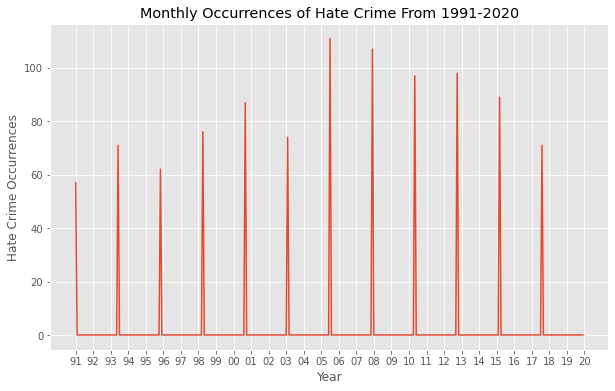

In [11]:
# This section of code plots the total number of hate crimes over time (each point represents one month)

months_total = month_counter1 + month_counter2 + month_counter3 + month_counter4 + month_counter5 + month_counter6 + month_counter7 + month_counter8 + month_counter9 + month_counter10 + month_counter11 + month_counter12
labels = ["91", '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03',
         '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
          '17', '18', '19', '20']

x_axis = np.linspace(0, 360, 30)
plt.plot(months_total)

plt.xlabel("Year")
plt.ylabel("Hate Crime Occurrences")
plt.title("Monthly Occurrences of Hate Crime From 1991-2020")
plt.xticks(x_axis, labels)

plt.show()

In [12]:
# This code creates a csv for the hate crimes committed each month from jan 1991 to the end of 2020 that is used in other programs

# import csv
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# years = ["91", '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03',
#          '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
#           '17', '18', '19', '20']
# i = 0
# with open('Data/monthly_totals.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#     while i < 30:
#         writer.writerow([years[i],month_counter1[i], month_counter2[i], month_counter3[i], month_counter4[i], 
#                          month_counter5[i], month_counter6[i], month_counter7[i], month_counter8[i], month_counter9[i], 
#                          month_counter10[i], month_counter11[i], month_counter12[i]])
#         i += 1
# file.close()

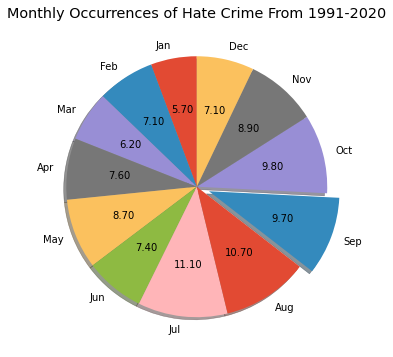

In [13]:
# This plots the proportions of hate crimes committed each month
jan = 0
feb = 0
mar = 0
apr = 0
may = 0
jun = 0
jul = 0
aug = 0
sep = 0
octo =0
nov = 0
dec = 0
i = 0
while i < len(month_counter):
    jan += month_counter1[i] 
    feb += month_counter2[i] 
    mar += month_counter3[i] 
    apr += month_counter4[i] 
    may += month_counter5[i] 
    jun += month_counter6[i] 
    jul += month_counter7[i] 
    aug += month_counter8[i] 
    sep += month_counter9[i] 
    octo += month_counter10[i] 
    nov += month_counter11[i] 
    dec += month_counter12[i] 
    i += 1
    
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 12)
explode = [0]*12
explode[8] = .1
legend = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2.5 else ''

months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
plt.pie(months, autopct = my_autopct, labels = legend, explode = explode, shadow = True, startangle = 90)

#plt.legend(legend)
plt.title("Monthly Occurrences of Hate Crime From 1991-2020")


plt.show()

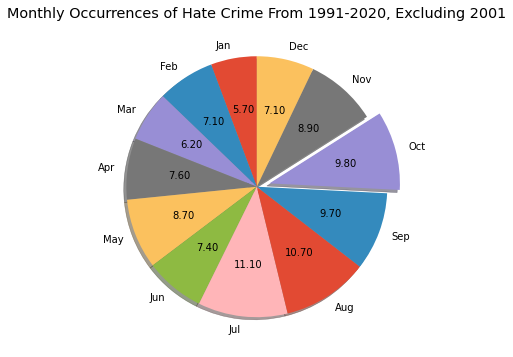

In [14]:
# This plots the proportions of hate crimes committed each month, excluding 2001
jan = -month_counter1[10]
feb = -month_counter2[10]
mar = -month_counter3[10]
apr = -month_counter4[10]
may = -month_counter5[10]
jun = -month_counter6[10]
jul = -month_counter7[10]
aug = -month_counter8[10]
sep = -month_counter9[10]
octo =-month_counter10[10]
nov = -month_counter11[10]
dec = -month_counter12[10]
i = 0
while i < len(month_counter):
    jan += month_counter1[i] 
    feb += month_counter2[i] 
    mar += month_counter3[i] 
    apr += month_counter4[i] 
    may += month_counter5[i] 
    jun += month_counter6[i] 
    jul += month_counter7[i] 
    aug += month_counter8[i] 
    sep += month_counter9[i] 
    octo += month_counter10[i] 
    nov += month_counter11[i] 
    dec += month_counter12[i] 
    i += 1
    
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 12)
explode = [0]*12
explode[9] = .1
legend = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2.5 else ''

months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
plt.pie(months, autopct = my_autopct, labels = legend, explode = explode, shadow = True, startangle = 90)

#plt.legend(legend)
plt.title("Monthly Occurrences of Hate Crime From 1991-2020, Excluding 2001")


plt.show()

In [15]:
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame as pd
import csv
from datetime import datetime  


Date_List = []

for i in range(16):
    
    link = 'https://www.justice.gov/news?sort=field_pr_date&order=desc&keys=hate%20crime&items_per_page=50&page={}'.format(i)
    page = requests.get(link)
    soup=BeautifulSoup(page.text,'html.parser')
    
    headline_news = soup.find_all("div", attrs={'class': 'views-field views-field-title'})
    date = soup.find_all('span', attrs = {'class': 'date-display-single'})

# Create List of Strings
    for d in date:
        
        Dates = d.get_text()
        #print(Dates)
    
        Date_List.append(Dates)
    
#print(Date_List)  


e = 12 * [0]
year_dict = {2009: e.copy(), 2010: e.copy(),2011: e.copy(),2012: e.copy(), 
          2013: e.copy(), 2014: e.copy(), 2015: e.copy(), 2016: e.copy(), 
          2017: e.copy(), 2018: e.copy(),2019: e.copy(),2020: e.copy(), 
          2021: e.copy(), 2022: e.copy()}
months = 12 * [0]
dates = []
#print(year_dict)
# Turns List of Strings into List of Datetime Objects
for date in Date_List:
    dates.append(datetime.strptime(date, '%B %d, %Y'))

#print(dates)
#for date in dates:
    #months[date.month-1] = months[date.month-1] + 1


for i in dates:
    
    year_dict[i.year][i.month-1] = year_dict[i.year][i.month-1] + 1
#print(year_dict)
        
  


C:\Users\arian\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


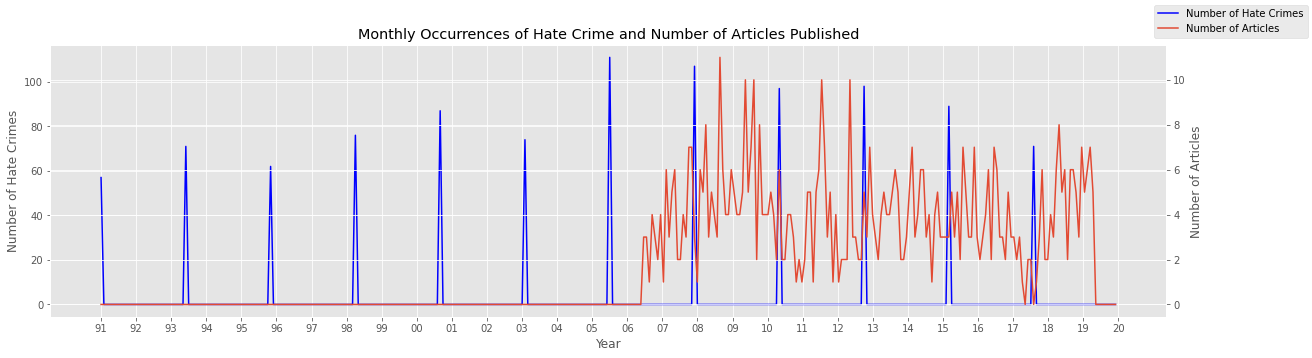

In [17]:
import matplotlib.pyplot as plt
months_total = month_counter1 + month_counter2 + month_counter3 + month_counter4 + month_counter5 + month_counter6 + month_counter7 + month_counter8 + month_counter9 + month_counter10 + month_counter11 + month_counter12
labels = ["91", '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03',
         '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
          '17', '18', '19', '20']

i = 0
month_shift = [0]*192
while i < 168:
    month_shift.append(y_month[i])
    i += 1

x_axis = np.linspace(0, 360, 30)

fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(5)
ax1.plot(months_total, 'blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Hate Crimes")

ax2=ax1.twinx()
ax2.plot(month_shift)
ax2.set_ylabel("Number of Articles")
plt.title("Monthly Occurrences of Hate Crime and Number of Articles Published")
fig.legend(['Number of Hate Crimes', 'Number of Articles'])

plt.xticks(x_axis, labels)
plt.show()

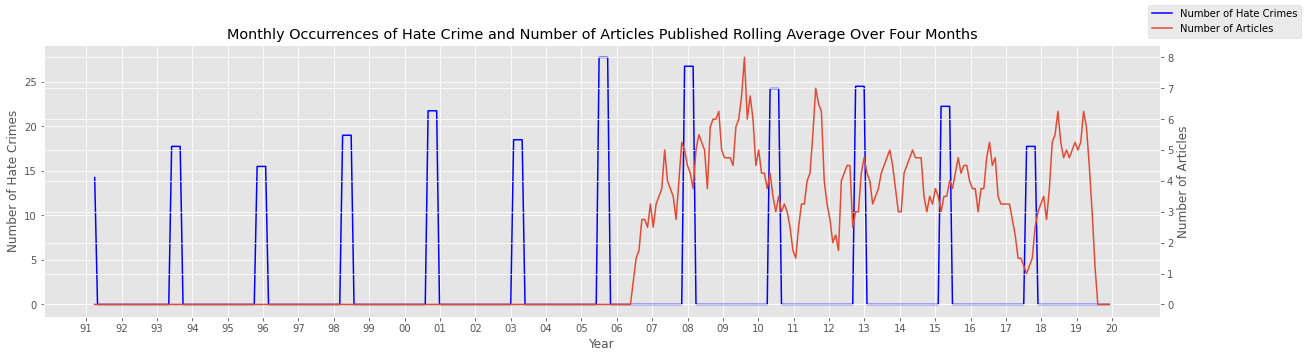

In [19]:
# This code is used to create a rolling average of the hate crimes and the number of articles published.
import pandas as pd

months_df = pd.DataFrame(months_total)
articles_df = pd.DataFrame(month_shift)

hate_crimes = [0]*4
articles = [0]*4

hate_crimes[0] = months_df.rolling(window = 1, center = False).mean()
hate_crimes[1] = months_df.rolling(window = 2, center = False).mean()
hate_crimes[2] = months_df.rolling(window = 3, center = False).mean()
hate_crimes[3] = months_df.rolling(window = 4, center = False).mean()

articles[0] = articles_df.rolling(window = 1, center = False).mean()
articles[1] = articles_df.rolling(window = 2, center = False).mean()
articles[2] = articles_df.rolling(window = 3, center = False).mean()
articles[3] = articles_df.rolling(window = 4, center = False).mean()

x_axis = np.linspace(0, 360, 30)
fig, ax3 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(5)
ax3.plot(hate_crimes[3], 'blue')
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of Hate Crimes")

ax4=ax3.twinx()
ax4.plot(articles[3])
ax4.set_ylabel("Number of Articles")
plt.title("Monthly Occurrences of Hate Crime and Number of Articles Published Rolling Average Over Four Months")
fig.legend(['Number of Hate Crimes', 'Number of Articles'])
plt.xticks(x_axis, labels)
plt.show()

